# <span style="color:navy">IBM Capstone Project</span>

This is an orignal project completed as part of the IBM Data Science Professional Certification. 

## Table of contents
* [Overview of Project](#Overview)
* [Stage 1](#Stage1)
* [Stage 2](#Stage2)
* [Stage 3](#Stage3)
* [Stage 4](#Stage4)
* [Results and Discussion](#Results)
* [Conclusion](#Conclusion)

## Overview of Project<a name="Overview"></a>

In this Project, publicly available datasets from the Glasgow City Council and the Royal Mail are used alongside data collected from the FourSquareAPI in order to obtain data driven insight into possible business opportunities in Glasgow and the best venues for those opportunities. The project is divided into 4 stages.

### <span style="color:navy">In Stage 1-</span> 
Data of all the post codes is scraped from a website and saved into a data frame. This results in a dataframe with 56 postal codes. The data is then cleaned to remove non-geographical post codes. After the data processing the post codes are reduced to 50 valid entries. For each of the postal code addresses, the latitude and longitude are determined using the foursquareAPI. The 50 postal codes are further shortlisted based on two criteria which are distance to the city centre and the distance to the nearest subway station. For this analysis post codes within 5 km of the city centre and within 2 km of the nearest subway station are considered. In order to determine the distance between the city centre and a given post code, the **Haversine formula** is used. The same is done to find the distance between a postal code and the nearest subway station. Based on the distance criteria specified above, the final post code list is reduced to 10 post codes. 

 Shortlisted Post codes |      
---                     | 
G1 G2 G3 G4 G5 G11 G12 G20 G41 G51  |


**Note-** The choice of 5 km from the city centre and 2 km from the nearest subway is an arbitrary choice. In order to generate a new analysis with a different set of parameters the variables in cell 1 below can be changed. This will result in a new set of postal codes being clustered into the number of clusters specified (in this case 5) using the K-means algorithm in stage 4.

### <span style="color:navy">In Stage 2-</span> 
Publicly available data sets are used to determine the population at each of the 10 shortlisted postcode along with population diversity. A direct dataset to map postal codes to population is not available. Therefore, two datasets were used to extract this information. The [Royal Mail Data set](http://www.glasgow.gov.uk/CHttpHandler.ashx?id=16002&p=0) maps Postal codes to Datazones and the [Glasgow City Council Data Set](https://data.glasgow.gov.uk/dataset/national-identity-by-ethnic-group-2011-census) maps datazones to population information (total population and ethnicities of the population). The information is extracted using both dataset and visualized.

### <span style="color:navy">In Stage 3-</span>
In this stage, the venues in each postcode are extracted using the FourSquaresAPI. This is done in order to perform a competition analysis at each postcode and identify possible opportunities at these locations. The centre of postcodes are the latitude and longitude determined in stage 1. A search area of 1.5 km around that centre is defined. 100 venues are requested from each of the locations. The data set is processed to remove repeating entries. There are ≈ 420 business venues in the 10 shortlisted postcodes given above.

### <span style="color:navy">In Stage 4-</span>
In this stage of the project, the ≈ 420 venues obtained in the last stage are processed. There are 114 unique venue categories. They are one hot encoded. Then the top five venues are found in each postal code. These Top five venue is saved in a dataframe. The dataframe containing population information along with distance from the city centre, distance from the nearest subway station is normalized. This data frame is then merged with the data frame containing the Top 5 venues. It is then feed into a k-mean clustering algorithm in order to classify the postal codes into 5 distinct categories. The clusters are then colour coded and plotted on a Map. 

### <span style="color:navy">Results and Discussion-</span>
A summary of the cluster label results from the K-means algorithm is given in the table below. Based on the similarity of the postal codes, cluster descriptions are defined along with the identification of possible business opportunities in each cluster.   

K-means Cluster label | 0 | 1 | 2 | 3 | 4      
---                    |---|---|---|---|---
<span style="color:maroon">Postal codes in the cluster</span> | **G3, G4 and G41** | **G5 and G51** | **G11 and G12** | **G1 and G2** | **G20**
<span style="color:maroon">Description of the clusters</span> | Cluster members have the highest population diversity and food related venues are the commonest in this cluster. | This cluster has a lot of hospitality and entertainment venues in the postcode | This cluster has medium population and low diversity. Food related venues are common in this cluster | These post codes have low population and medium diversity. Food related venues are common in this cluster. These postcodes also have the lowest distance from the city centre. | This cluster is furthest away from the city centre and has a high population with no entertainment venues
<span style="color:maroon">Possible Business Oportunities in this Cluster</span> | These Postal codes have among the highest Asian population density in Glasgow. Non-food Asian themed businesses are likely to face little competition in these three postal codes. So, G3, G4 and G41 are recommended as venues for new Asian businesses. | In this cluster, there are a lot of hotels, bowling alleys, music venues and not a lot of food venues like restaurants, bars/pubs etc. So, new restaurants, bars and pubs will face little competition. So, they are identified as possible business opportunities in this cluster. | The Postal codes in this cluster are close to one of the largest universities in Glasgow. So, this cluster offers opportunities for student service businesses like books, stationary, printing shops etc. These businesses have the potential to succeed in this area and have little competition at these postcodes. | This cluster has postal codes that are near the city centre. So, at these postal codes there are opportunities for businesses that want to provide services to tourists like tour operators, souvenir shops, hotels etc. | This post code lacks entertainment venues. So, in G20 there are opportunities for entertainment & leisure businesses like movie cinemas, music clubs etc that want to target a new sector of the Glasgow population.

### <span style="color:navy">Conclusion-</span>
This project uses publicly available datasets and the FourSquareAPI to provide businesses insights and recommendations about the best venues within Glasgow to set up various businesses based on opportunities identified using the application of data analysis and Machine learning.  

# <span style="color:black">Stage 1</span> <a name="Stage1"></a>

---

There are a total of 56 postal codes in Glasgow. In this first stage of this project, The postal codes are narrowed down based on two criteria. The criteria is as follows. 

The shortlisted Post codes must 
- be within 5 km of the city centre
- have good transport accessibility (must be within 2 km of a subway station)

In [1]:
# Defining the Search Paramenter variables
Distance_from_city_center = 5 #In Km
Distance_from_Subway_station = 2 #In Km
kclusters = 5  #This is the number clusters that the shortlisted postal codes will be shortlisted into in Stage 4

### 1.1 Scraping the Glasgow Postal Addresses from Wikipedia

In [2]:
#Importing the Libraries   
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
#Scraping data from web and saving into pandas dataframe
res = requests.get("https://en.wikipedia.org/wiki/G_postcode_area")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[1]
df = pd.read_html(str(table))
Glasgow_df=pd.DataFrame(df[0])
Glasgow_df.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  
0                  Former C1 district: Merchant City         Glasgow City  
1  Former C2 district: Blythswood Hill, Anderston...         Glasgow City  
2  Former C3 district: Anderston, Finnieston, Gar...         Glasgow City  
3  Former C4 district: Calton (part), Cowcaddens ...         Glasgow City  
4                        Former C5 district: Gorbals         Glasgow City

In [4]:
#Printing the shape of the data frame before Preprocessing 
print(Glasgow_df.shape)

(56, 4)


There are a total of <span style="color:maroon">**56**</span> G postal codes.

###  1.2 Prepossing of the Data

In this step, the data in the dataframe is processed in order to remove invalid entries. This reduces the data frame to 50 entries. Information about the former districts is removed from the coverage column. A new column is also added to the dataframe. This column contains the first coverage entry. This new column is called 'District'. This column will later will be used to find the coordinates of the Postal code. 

In [5]:
# Droping the entries where the Local authority area is not defined
Glasgow_df=Glasgow_df[Glasgow_df['Local authority area'] != 'non-geographic']
Glasgow_df= Glasgow_df[Glasgow_df['Postcode district']!='G51 2']
Glasgow_df=Glasgow_df.reset_index(drop=True,inplace=False)
Glasgow_df['Postcode district']= Glasgow_df['Postcode district'].str.rsplit(" ", n =0 , expand = False).str[0]
Glasgow_df.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  
0                  Former C1 district: Merchant City         Glasgow City  
1  Former C2 district: Blythswood Hill, Anderston...         Glasgow City  
2  Former C3 district: Anderston, Finnieston, Gar...         Glasgow City  
3  Former C4 district: Calton (part), Cowcaddens ...         Glasgow City  
4                        Former C5 district: Gorbals         Glasgow City

In [6]:
#Printing the shape of the new data frame
print(Glasgow_df.shape)

(50, 4)


In [7]:
# Removing the former district information from the Coverage column 
for n in range (Glasgow_df.shape[0]):
    if ': ' in Glasgow_df['Coverage'][n]:
        t=Glasgow_df['Coverage'][n]
        Glasgow_df['Coverage'][n]=t.split(': ',2)[1]
Glasgow_df.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  
0                                      Merchant City         Glasgow City  
1                  Blythswood Hill, Anderston (part)         Glasgow City  
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City  
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City  
4                                            Gorbals         Glasgow City

In [8]:
# Forming a new Column called District which is the first area in the coverage column (This will be used to find the Latitude and Longitude Information)  
Glasgow_df['District']= Glasgow_df['Coverage'].str.rsplit(",", n =0 , expand = False).str[0] 
Glasgow_df['District']= Glasgow_df['District'].str.rsplit("(", n =0 , expand = False).str[0]
Glasgow_df['District'][47]='Hardgate'

In [9]:
#Printing the Entire Data Frame
Glasgow_df.shape

(50, 5)

### 1.3 Finding the Latitude and Longitude Information for all the G Postal codes

For the remaining valid postcode entries, Foursquare is used to find the coordinates (latitude and longitude) of each of the post codes. The following code is used. It uses the Nominatim library. The postal codes are found be feeding an address to the geolocator.geocode function. The input of the function is the Postal code and District Information from the Data Frame. All the Postal addresses are manually saved in a csv file named **Postcode_Glasgow_Longitude_Latitude_Data** in the Excel_Data Folder. This file is read and saved into a data frame that is then merged with the data frame scraped form the web.

(The code):

    from geopy.geocoders import Nominatim
    for n in range (0,Glasgow_df.shape[0]):
        address = '{}, {}, Glasgow'.format(Glasgow_df['Postcode district'][n], Glasgow_df['District'][n])
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude=location.latitude
        longitude=location.longitude
        print('Index:',n,'{},{} has latitude='.format(Glasgow_df['Postcode district'][n], Glasgow_df['District'][n]),latitude,'and longitide=', longitude)

In [10]:
#The csv file is read and saved in a data frame
Glasgow_df_latlng = pd.read_csv('Excel_Data/Postcode_Glasgow_Longitude_Latitude_Data.csv', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [11]:
#The Data is processed to add index values 
Glasgow_df_latlng.columns = list(map(str, Glasgow_df_latlng.columns))
Glasgow_df_latlng.reset_index(level=0, inplace=True)
Glasgow_df_latlng.head()

Postcode district   Latitude  Longitude
0                G1  55.859126  -4.246316
1                G2  55.863319  -4.261671
2                G3  55.859699  -4.271292
3                G4  55.853724  -4.232824
4                G5  55.851813  -4.253163

In [12]:
#The Glasgow_df and the Glasgow_df_latlng datasets are merged 
Glasgow = pd.merge(Glasgow_df, Glasgow_df_latlng, on='Postcode district')

In [13]:
#Displaying the entire dataset
Glasgow.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  \
0                                      Merchant City         Glasgow City   
1                  Blythswood Hill, Anderston (part)         Glasgow City   
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City   
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City   
4                                            Gorbals         Glasgow City   

          District   Latitude  Longitude  
0    Merchant City  55.859126  -4.246316  
1  Blythswood Hill  55.863319  -4.261671  
2        Anderston  55.859699  -4.271292  
3          Calton   55.853724  -4.232824  
4          Gorbals  55.851813  -4.253163

### 1.4 Plotting the Postal Codes on a Map

All the 50 postal codes are plotted on a map to visualize their geographical distribution. The Folium library is used to plot the map.

In [14]:
# Importing the Libraries 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim 
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium
from folium import IFrame
import numpy as np

Finding the Coordinates of Glasgow City to center the map:

    address = 'Glasgow, UK'
    geolocator = Nominatim(user_agent="t_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of Glasgow, UK are {}, {}.'.format(latitude, longitude))

In [15]:
#Coordinates of Glasgow City Center
latitude = 55.8609825
longitude = -4.2488787

In [16]:
# create map of Glasgow using latitude and longitude values to show all the Postal Codes
map_Glasgow = folium.Map(location=[latitude, longitude], zoom_start=9.5)
for lat, lng, post in zip(Glasgow['Latitude'], Glasgow['Longitude'], Glasgow['Postcode district']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Glasgow)  

text = 'City Center of Glasgow'
iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)
Text = folium.Marker(location=[55.8609825,-4.2488787], popup=popup)
map_Glasgow.add_child(Text)

map_Glasgow

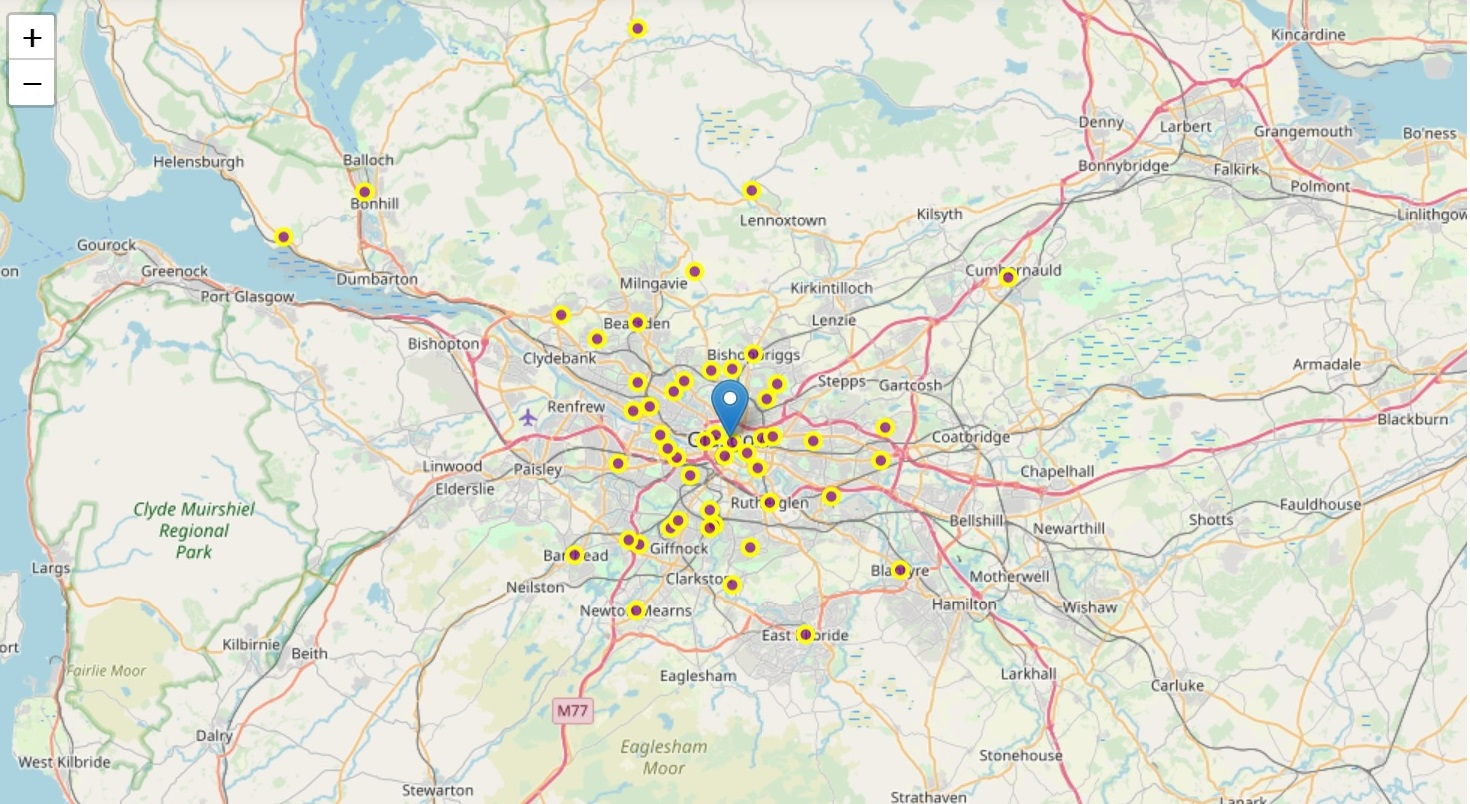

In [17]:
from IPython.display import Image
Image("Images/Glasgow_AllPostcodes.jpg")

As it can be seen from the Map Above, the Postal codes are spread over a very large area. Therefore in order to focus the analysis the postal codes near the City Centre (within 5 km) are considered.

## <span style="color:maroon">1.5 Criteria 1</span>

### 1.5.1 Calculating the Distance of the Postal Codes from the city center

In order to find the post codes that are within 5 km of the city centre, The Haversine formula is used to find the distance between two pair of latitude and longitude coordinates. For this a function is written called **calculate_distance_from_Glasgow_City_Center**. The distance for each postal code is found and saved into the data frame.

In [18]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance_from_Glasgow_City_Center(latitude,longitude):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(55.8609825) # Latitude Coordinates for the Glasgow City Center
    lon1 = radians(-4.2488787) # Longitude Coordinates for the Glasgow City Center
    lat2 = radians(latitude)
    lon2 = radians(longitude)
    #Haversine Formula to find distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance #The distance is returned in km

In [19]:
import numpy as np
distance=np.zeros((Glasgow_df.shape[0]))
for n in range (Glasgow_df.shape[0]):
    distance[n]=calculate_distance_from_Glasgow_City_Center(Glasgow['Latitude'][n],Glasgow['Longitude'][n])
Glasgow['Distance from Center']=distance

In [20]:
Glasgow.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  \
0                                      Merchant City         Glasgow City   
1                  Blythswood Hill, Anderston (part)         Glasgow City   
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City   
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City   
4                                            Gorbals         Glasgow City   

          District   Latitude  Longitude  Distance from Center  
0    Merchant City  55.859126  -4.246316              0.261226  
1  Blythswood Hill  55.863319  -4.261671              0.839709  
2        Anderston  55.859699  -4.271292              1.406410  
3          Calton   55.853724  -4.232824              1.287026  
4          Gorbals  55.851813  -4.253163              1.054402

### 1.5.2 Plotting the Postal codes that are within 5 km of the city center 

The folium library is used again to plot the postal codes within 5 km of the city center. 

In [21]:
#Color Mapping function
def colormapping(distance,req):
    threshold=req
    if distance<=threshold:
        return 'green'
    else:
        return 'red'

In [22]:
# create map centered around Glasgow
map_Glasgow = folium.Map(location=[latitude, longitude], zoom_start=9.5)
# Plotting the postal codes, if postal code is within 5 km of city center they are plotted as green circles, 
# if they are not with in 5 km then they are red circles  
for lat, lng, post, dist in zip(Glasgow['Latitude'], Glasgow['Longitude'], Glasgow['Postcode district'], Glasgow['Distance from Center']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colormapping(dist, Distance_from_city_center),
        fill=True,
        fill_color=colormapping(dist, Distance_from_city_center),
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow)  

text = 'City Center of Glasgow'
iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)
Text = folium.Marker(location=[55.8609825,-4.2488787], popup=popup)
map_Glasgow.add_child(Text)

folium.Circle(
    location=[55.8609825,-4.2488787],
    radius=Distance_from_city_center*1000,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map_Glasgow)

map_Glasgow

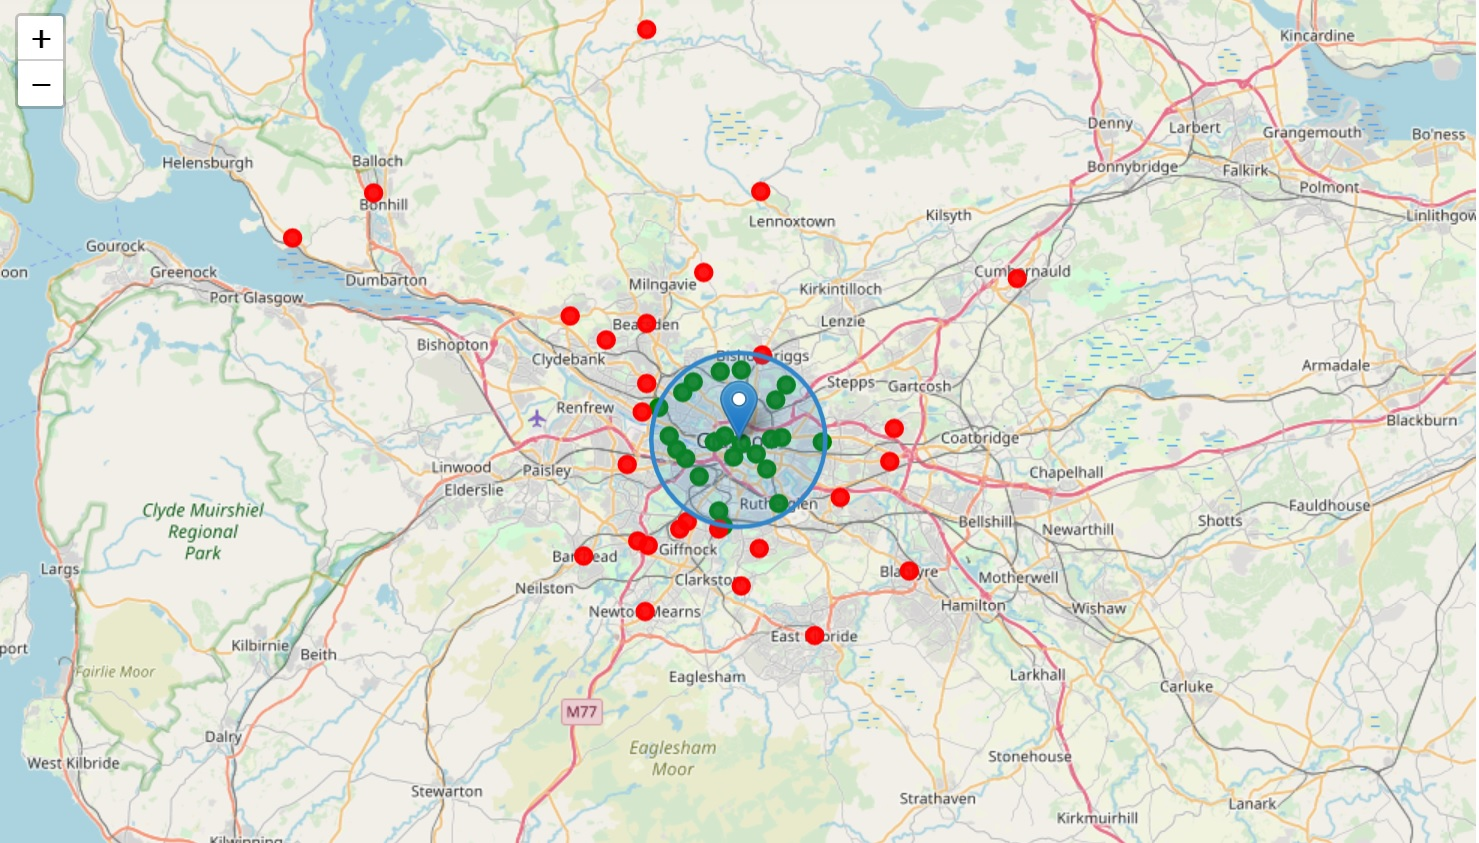

In [23]:
Image("Images/Glasgow_5km.jpg")

Post codes that satisfy the 5 km criteria are shown in green while those that don't satisfy the condition are plotted in red.

### 1.5.3 Performing second stage of data Preprossing to find postal codes with in 5 km of City Center

In [24]:
#Processing the the data set to remove the Postal codes that are more than the required distance away from the city center
Glasgow_dcc=Glasgow[Glasgow['Distance from Center'] <= Distance_from_city_center]
Glasgow_dcc.reset_index(drop=True,inplace = True) 
Glasgow_dcc.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  \
0                                      Merchant City         Glasgow City   
1                  Blythswood Hill, Anderston (part)         Glasgow City   
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City   
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City   
4                                            Gorbals         Glasgow City   

          District   Latitude  Longitude  Distance from Center  
0    Merchant City  55.859126  -4.246316              0.261226  
1  Blythswood Hill  55.863319  -4.261671              0.839709  
2        Anderston  55.859699  -4.271292              1.406410  
3          Calton   55.853724  -4.232824              1.287026  
4          Gorbals  55.851813  -4.253163              1.054402

In [25]:
Glasgow_dcc=Glasgow_dcc[Glasgow_dcc['Post town']=='GLASGOW']
print('There are',Glasgow_dcc.shape[0],'Postal codes that are within',Distance_from_city_center, 'km from the City Center') 

There are 22 Postal codes that are within 5 km from the City Center


## <span style="color:maroon">1.6 Criteria 2</span>

### 1.6.1 Finding the location of the Subway stations

The data set for the location of the Subway stations are available at this [link](https://data.glasgow.gov.uk/dataset/glasgow-subway-station-locations/resource/8c057567-55e7-4631-ae77-e37b4a0562e8) from the Glasgow City Council. The dataset is imported. The Nominatim library using foursquare_agent is used to find the coordinates of the Postal codes. These postal codes are manually added to an excel file titled **Subway_Latitude_Longitude** saved Excel_Data folder. This file is imported and merged with the dataset from the Glasgow city council.

In [26]:
#The excel file is read and saved in a data frame
Glasgow_df_subway = pd.read_excel('Excel_Data/glasgow_subway_station_locations.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [27]:
#The Data is processed to add index values 
Glasgow_df_subway.columns = list(map(str, Glasgow_df_subway.columns))
Glasgow_df_subway.reset_index(level=0, inplace=True)
#Glasgow_df_subway['Postcode'][9]='G51 1NW'
Glasgow_df_subway

Station Name  Address Line 1            Address Line 2 Address Line 3  \
0      Bridge Street              67           Eglinton Street        Glasgow   
1    Buchanan Street             174           Buchanan Street        Glasgow   
2           Cessnock               1           Cessnock Street        Glasgow   
3         Cowcaddens              11  Dundasvale Court, Unit 1        Glasgow   
4              Govan             737                Govan Road        Glasgow   
5           Hillhead             248                Byres Road        Glasgow   
6              Ibrox             124              Copland Road        Glasgow   
7         Kelvinhall               7             Dalcross Pass        Glasgow   
8       Kelvinbridge              99       South Woodside Road        Glasgow   
9       Kinning Park              30           Cornwall Street        Glasgow   
10           Partick              15           Merkland Street        Glasgow   
11      Sheilds Road             360           Scotland Street        Glasgow   
12         St. Enoch              10           St Enoch Square        Glasgow   
13  St Georges Cross              51        Great Western Road        Glasgow   
14       West Street             281               West Street        Glasgow   

   Postcode  Easting  Northing Accessible Park and Ride Wi-Fi Bike Shelter  \
0    G5 9NR   258710    664400        Yes           Yes   Yes          Yes   
1    G1 2JZ   259073    665577        Yes            No   Yes           No   
2   G51 1AS   256470    664490        Yes            No   Yes           No   
3    G4 0SN   258679    666191        Yes            No   Yes           No   
4   G51 2YJ   255490    665643        Yes            No   Yes           No   
5   G12 8SH   256615    667052        Yes            No   Yes           No   
6   G51 2UB   255830    664787        Yes            No   Yes           No   
7   G11 5RA   256184    666598        Yes            No   Yes           No   
8    G4 9HG   257475    666922        Yes           Yes   Yes          Yes   
9   G41 1AH   256864    664281        Yes            No   Yes           No   
10  G11 6DB   255635    666503        Yes            No   Yes          Yes   
11   G5 8QF   257660    664205        Yes           Yes   Yes          Yes   
12   G1 4DB   258946    665038        Yes            No   Yes           No   
13   G4 9AH   258106    666560        Yes            No   Yes           No   
14   G5 8NB   258220    664150        Yes            No   Yes           No   

   Special Car Sharing Parking Spaces Lost Property Number  \
0                                  No       0141 335 3276.   
1                                  No       0141 335 3276.   
2                                  No       0141 335 3276.   
3                                  No       0141 335 3276.   
4                                  No       0141 335 3276.   
5                                  No       0141 335 3276.   
6                                  No       0141 335 3276.   
7                                  No       0141 335 3276.   
8                                  No       0141 335 3276.   
9                                  No       0141 335 3276.   
10                                 No       0141 335 3276.   
11                                Yes       0141 335 3276.   
12                                 No       0141 335 3276.   
13                                 No       0141 335 3276.   
14                                 No       0141 335 3276.   

                                               Nearby  
0                      Citizen’s Theatre, 02 Academy.  
1   Queen’s Street Station, Buchanan Bus Station, ...  
2                  Glasgow Science Centre, IMAX, SECC  
3         Glasgow School of Art, GFT, Tenement House.  
4   Southern General Hospital, Govan Old Parish Ch...  
5   Byres Road, Ashton Lane, Botanic Gardens, Univ...  
6                                   Bellahouston Park  
7               Kelvi

The following code is used to find the latitude and Longitude of the 15 subway stations:

    from geopy.geocoders import Nominatim
    for n in range (0, Glasgow_df_subway.shape[0]):
        address = '{} {}, {}, Glasgow'.format(Glasgow_df_subway['Address Line 1'][n],Glasgow_df_subway['Address Line 2'][n], Glasgow_df_subway['Postcode'][n])
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude=location.latitude
        longitude=location.longitude
        print('Index:',n,'{},{} has latitude='.format(Glasgow_df_subway['Station Name'][n], Glasgow_df_subway['Postcode'][n]),latitude,'and longitide=', longitude)

In [28]:
#The excel file is read and saved in a data frame
Glasgow_df_subway_latlog = pd.read_excel('Excel_Data/Subway_Latitude_Longitude.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [29]:
Glasgow_df_subway_latlog.columns = list(map(str, Glasgow_df_subway_latlog.columns))
Glasgow_df_subway_latlog.reset_index(level=0, inplace=True)
Glasgow_df_subway_latlog.head()

Station Name   Latitude  Longitude
0    Bridge Street  55.851452  -4.259382
1  Buchanan Street  55.861888  -4.253626
2         Cessnock  55.852726  -4.294110
3       Cowcaddens  55.868063  -4.259899
4            Govan  55.861783  -4.308399

In [30]:
Glasgow_subway = pd.merge(Glasgow_df_subway, Glasgow_df_subway_latlog, on='Station Name')

### 1.6.2 Plotting the Map of the Glasgow Subway 

The folium library is used to plot the positions of the Subway stations in Glasgow.

In [31]:
map_Glasgow_Subway = folium.Map(location=[latitude, longitude],tiles='Stamen Toner', zoom_start=12)
for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
    location=[lat, lng],
    radius=Distance_from_Subway_station*1000,
    color='#3186cc',
    stroke= False,
    weight=1,
    fill=True,
    fill_opacity=0.1,
    fill_color='#3186cc'
    ).add_to(map_Glasgow_Subway)
for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    icon_url='https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Glasgow_Subway.svg/800px-Glasgow_Subway.svg.png'
    icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
    folium.Marker(
    location=[lat, lng],
    icon=icon,
    popup=label
    ).add_to(map_Glasgow_Subway)

    
map_Glasgow_Subway

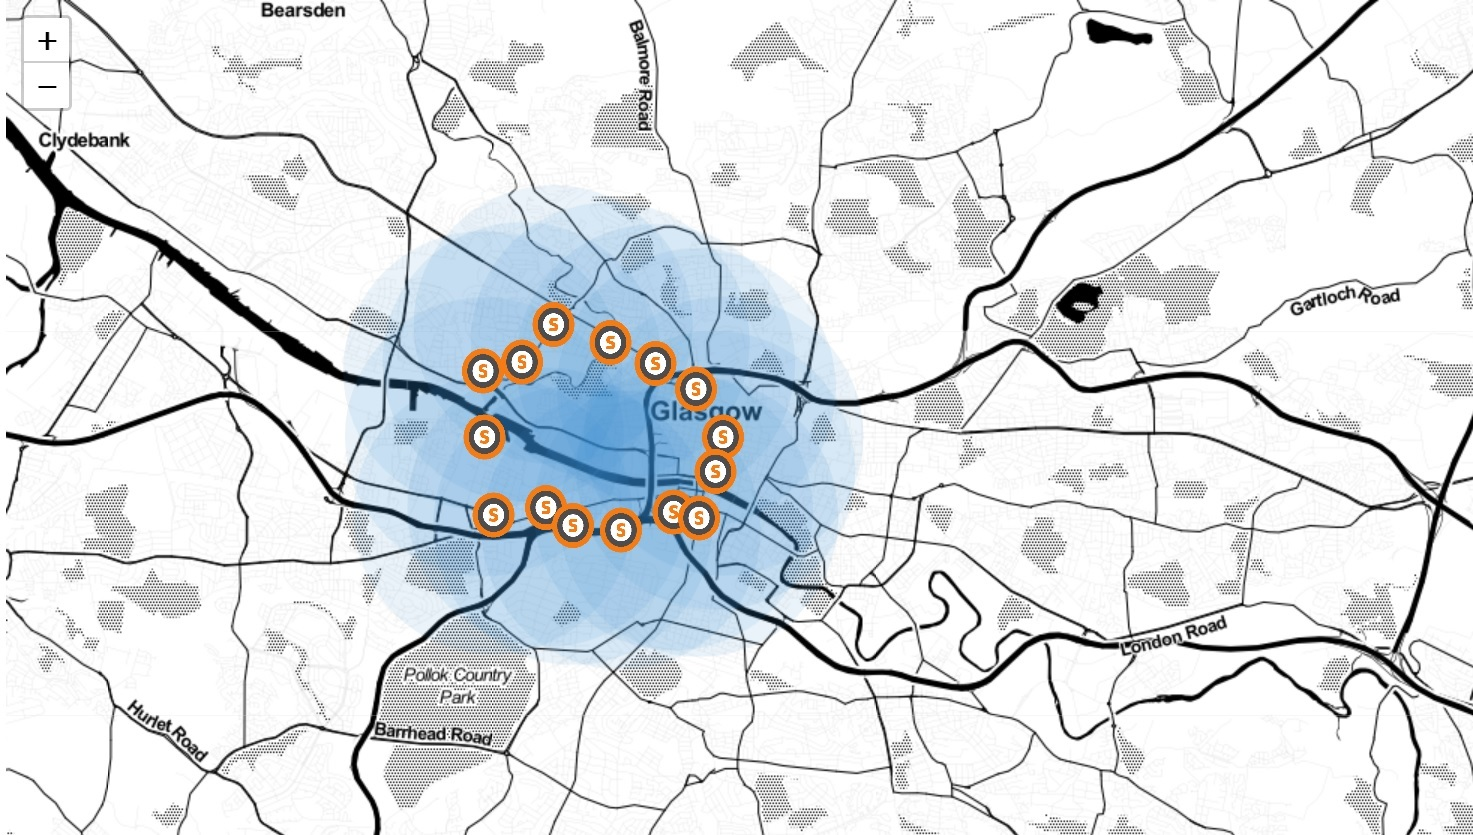

In [32]:
Image("Images/Glasgow_Subway.jpg")

### 1.6.3 Finding the Nearest Subway station and the distance between the postal code and that Subway station

For the 22 Postal codes that are within 5km of the city centre, the distance from the nearest subway station is found. For this a function is written that uses the Haversine Formula to find distance. It returns the name of the nearest subway station and distance to the nearest subway station. Both these parameters are added to that data frame.

In [33]:
# Function that returns the distance of the closest subway station and the name of that station
def calculate_distance_from_Subway_station(latitude,longitude):
    Station_names=['Bridge Street', 
                   'Buchanan Street', 
                   'Cessnock', 
                   'Cowcaddens', 
                   'Govan', 
                   'Hillhead', 
                   'Ibrox', 
                   'Kelvinhall', 
                   'Kelvinbridge', 
                   'Kinning Park',
                   'Partick', 
                   'Sheilds Road', 
                   'St. Enoch', 
                   'St Georges Cross', 
                   'West Street']
    distancesarray=np.zeros((len(Station_names)))
    for n in range (len(Station_names)):
        # approximate radius of earth in km
        R = 6373.0
        lat1 = radians(Glasgow_subway['Latitude'][n]) 
        lon1 = radians(Glasgow_subway['Longitude'][n]) 
        lat2 = radians(latitude)
        lon2 = radians(longitude)
        #Haversine Formula to find distance
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distancesarray[n] = R * c
        
    min_distance=min(distancesarray)
    index_min=np.argmin(distancesarray)
    station=Station_names[index_min]
    
    return min_distance, station #The distance is returned in km

In [34]:
# Calling the calculate_distance_from_Subway_station function on the postal codes that are within 5 km of 
nearest_station=[]
distancesfromsubway=np.zeros((Glasgow_dcc.shape[0]))
for n in range (Glasgow_dcc.shape[0]):
    lat1=Glasgow_dcc['Latitude'][n]
    long1=Glasgow_dcc['Longitude'][n]
    dist, stat = calculate_distance_from_Subway_station(lat1,long1)
    distancesfromsubway[n]=dist
    nearest_station.append(stat)

In [35]:
Glasgow_dcc['Distance from Nearest Subway']=distancesfromsubway
Glasgow_dcc['Nearest Subway']=nearest_station

In [36]:
Glasgow_dcc.head()

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  \
0                                      Merchant City         Glasgow City   
1                  Blythswood Hill, Anderston (part)         Glasgow City   
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City   
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City   
4                                            Gorbals         Glasgow City   

          District   Latitude  Longitude  Distance from Center  \
0    Merchant City  55.859126  -4.246316              0.261226   
1  Blythswood Hill  55.863319  -4.261671              0.839709   
2        Anderston  55.859699  -4.271292              1.406410   
3          Calton   55.853724  -4.232824              1.287026   
4          Gorbals  55.851813  -4.253163              1.054402   

   Distance from Nearest Subway   Nearest Subway  
0                      0.550108  Buchanan Street  
1                      0.526778  Buchanan Street  
2                      0.912032      West Street  
3                      1.474669        St. Enoch  
4                      0.390402    Bridge Street

### 1.6.4 Plotting the Postal codes that are with in 2 km of Subway station and 5 km for the city center

Folium library is used to plot the Map. The postal codes that are within 2 km of subway station and 5 km from city center are plotted in green.  

In [37]:
# create map centered around Glasgow
map_Glasgow_Subway_5k = folium.Map(location=[latitude, longitude], zoom_start=11.5)
# Plotting the postal codes, if postal code is within 5 km of city center they are plotted as green circles, 
# if they are not with in 5 km then they are red circles

text = 'City Center of Glasgow'
iframe = folium.IFrame(text, width=200, height=25)
popup = folium.Popup(iframe, max_width=3000)
Text = folium.Marker(location=[55.8609825,-4.2488787], popup=popup)
map_Glasgow_Subway_5k.add_child(Text)

folium.Circle(
    location=[55.8609825,-4.2488787],
    radius=Distance_from_city_center*1000,
    color='#3186cc',
    fill=True,
    stroke= False,
    fill_color='#3186cc',
    fill_opacity=0.4
).add_to(map_Glasgow_Subway_5k)

for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
    location=[lat, lng],
    radius=Distance_from_Subway_station*1000,
    color='#3186cc',
    stroke= False,
    weight=1,
    fill=True,
    fill_opacity=0.1,
    fill_color='orange'
    ).add_to(map_Glasgow_Subway_5k)
for lat, lng, sname in zip(Glasgow_subway['Latitude'], Glasgow_subway['Longitude'], Glasgow_subway['Station Name']):
    label = 'Station Name: {}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    icon_url='https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Glasgow_Subway.svg/800px-Glasgow_Subway.svg.png'
    icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
    folium.Marker(
    location=[lat, lng],
    icon=icon,
    popup=label
    ).add_to(map_Glasgow_Subway_5k)
    
for lat, lng, post, dist in zip(Glasgow_dcc['Latitude'], Glasgow_dcc['Longitude'], Glasgow_dcc['Postcode district'], Glasgow_dcc['Distance from Nearest Subway']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colormapping(dist, Distance_from_Subway_station),
        fill=True,
        fill_color=colormapping(dist, Distance_from_Subway_station),
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow_Subway_5k)  

    
map_Glasgow_Subway_5k

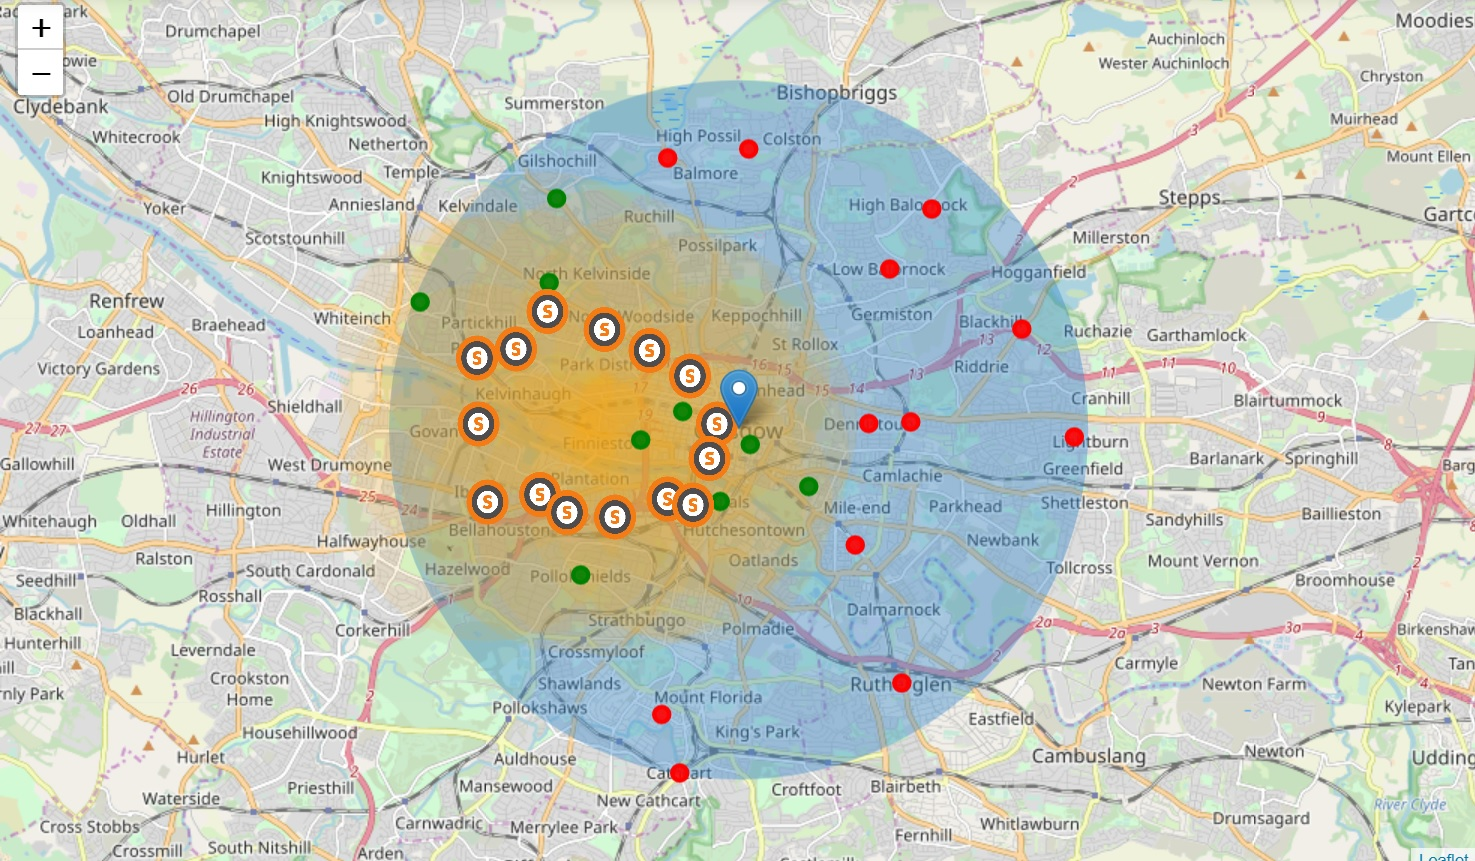

In [38]:
Image("Images/Glasgow_Subway_5k.jpg")

### 1.6.5 Processing the data frame to identity the postal codes that satisfy criteria 1 and 2

In [39]:
#Processing the the data set to remove the Postal codes that are more than the required distance away from the Subway Stations 
Glasgow_dss=Glasgow_dcc[Glasgow_dcc['Distance from Nearest Subway'] <= Distance_from_Subway_station]
Glasgow_dss.reset_index(drop=True,inplace = True) 
Glasgow_dss.head(10)

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   
5               G11   GLASGOW   
6               G12   GLASGOW   
7               G20   GLASGOW   
8               G41   GLASGOW   
9               G51   GLASGOW   

                                            Coverage Local authority area  \
0                                      Merchant City         Glasgow City   
1                  Blythswood Hill, Anderston (part)         Glasgow City   
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City   
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City   
4                                            Gorbals         Glasgow City   
5                    Broomhill, Partick, Partickhill         Glasgow City   
6  West End (part), Cleveden, Dowanhill, Hillhead...         Glasgow City   
7                Maryhill, North Kelvinside, Ruchill         Glasgow City   
8                           Pollokshields, Shawlands         Glasgow City   
9                               Cessnock, Plantation         Glasgow City   

          District   Latitude  Longitude  Distance from Center  \
0    Merchant City  55.859126  -4.246316              0.261226   
1  Blythswood Hill  55.863319  -4.261671              0.839709   
2        Anderston  55.859699  -4.271292              1.406410   
3          Calton   55.853724  -4.232824              1.287026   
4          Gorbals  55.851813  -4.253163              1.054402   
5        Broomhill  55.877340  -4.321745              4.897992   
6        West End   55.879886  -4.292322              3.430967   
7         Maryhill  55.890787  -4.290405              4.207631   
8    Pollokshields  55.842266  -4.284997              3.069140   
9         Cessnock  55.854152  -4.294398              2.941483   

   Distance from Nearest Subway   Nearest Subway  
0                      0.550108  Buchanan Street  
1                      0.526778  Buchanan Street  
2                      0.912032      West Street  
3                      1.474669        St. Enoch  
4                      0.390402    Bridge Street  
5                      1.124514          Partick  
6                      0.411294         Hillhead  
7                      1.629398         Hillhead  
8                      0.927243     Kinning Park  
9                      0.159598         Cessnock

In [40]:
print('There are',Glasgow_dss.shape[0],'Postal codes that are within',Distance_from_city_center, 'km from the City Center and that are within', Distance_from_Subway_station,'km from the subway stations') 

There are 10 Postal codes that are within 5 km from the City Center and that are within 2 km from the subway stations


This concludes stage 1 of the project

---

# Stage 2  <a name="Stage2"></a>
---

In this stage, the population and population diversity at each of the shortlisted 10 post code is determined using publicly available data sets. Two data set are used.

1) [Royal Mail Data set:](http://www.glasgow.gov.uk/CHttpHandler.ashx?id=16002&p=0) This data set contains all the postal codes in Glasgow. It has almost 15,000 data entries. Along with the Postal codes it also has the corresponding Datazone

2) [Glasgow City Council Data Set:](https://data.glasgow.gov.uk/dataset/national-identity-by-ethnic-group-2011-census) This data set contains the Datazone entries along with the national Identity of the population in that Data Zone. The data set has almost 6200 entries.

Both these data sets are imported and processed to extract the population at each postcode. The ethnicity of the population is also extracted. This information is then plotted for more insight. It will also be used along with the most common venues at each postal code to cluster the areas using K-means algorithm in Stage 4.

### 2.1 Data Preprocessing of the Glasgow City council Data Set

The Glasgow City Council data set is imported and processed.

In [41]:
Glasgow_ethnicity = pd.read_excel('Excel_Data/nationalidentitybyethnicgroup_2.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [42]:
Glasgow_ethnicity.columns = list(map(str, Glasgow_ethnicity.columns))
Glasgow_ethnicity.reset_index(level=0, inplace=True)
Glasgow_ethnicity.head()

Data Zone Intermediate Geography Name  \
0  S01003025            Carmunnock South   
1  S01003025            Carmunnock South   
2  S01003025            Carmunnock South   
3  S01003025            Carmunnock South   
4  S01003025            Carmunnock South   

                              Sub group  All people  White: Total  \
0                            All people         857           833   
1                Scottish identity only         517           508   
2                 British identity only          89            80   
3  Scottish and British identities only         193           191   
4     Scottish and any other identities          15            14   

   White: Scottish  White: Other British  White: Irish  White: Other (1)  \
0              741                    50            20                22   
1              482                     7            12                 7   
2               57                    20             1                 2   
3              189                     0             1                 1   
4                8                     4             0                 2   

   Mixed or multiple ethnic groups  Asian Asian Scottish or Asian British  \
0                                1                                     20   
1                                1                                      8   
2                                0                                      9   
3                                0                                      2   
4                                0                                      1   

   African  Caribbean or Black  Other ethnic groups  
0        0                   1                    2  
1        0                   0                    0  
2        0                   0                    0  
3        0                   0                    0  
4        0                   0                    0

In [43]:
Glasgow_ethnicity.shape

(6210, 14)

In [44]:
Glasgow_ethnicity_df=Glasgow_ethnicity[Glasgow_ethnicity['Sub group'] == 'All people']
Glasgow_ethnicity_df.reset_index(drop=True,inplace = True) 

In [45]:
Glasgow_ethnicity_df=Glasgow_ethnicity_df[['Data Zone', 'All people', 'White: Total', 'Asian Asian Scottish or Asian British', 'African']]

In [46]:
Glasgow_ethnicity_df.shape

(690, 5)

### 2.2 Preprocessing the Royal Mail Data Set

In [47]:
Glasgow_Royalmail = pd.read_excel('Excel_Data/RoyalMailPostalCodes.xlsx', index_col=0)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [48]:
Glasgow_Royalmail.columns = list(map(str, Glasgow_Royalmail.columns))
Glasgow_Royalmail.reset_index(level=0, inplace=True)
Glasgow_Royalmail.head()

Postcode unit Type of Postcode Sector Community Planning Partnership   \
0        G1 1BL       small user                             North West   
1        G1 1BQ       small user                             North West   
2        G1 1BX       Large User                             North West   
3        G1 1DA       small user                             North West   
4        G1 1DG       small user                             North West   

  Multi member Ward / Local Area Partnership  Data Zone  \
0                             Anderston/City  S01003366   
1                             Anderston/City  S01003358   
2                             Anderston/City  S01003399   
3                             Anderston/City  S01003358   
4                             Anderston/City  S01003358   

   Data Zone Rank (SIMD 2012) Is this in a bottom 15% Data Zone?  
0                        4833                                 no  
1                        1847                                 no  
2                        4029                                 no  
3                        1847                                 no  
4                        1847                                 no

Creating a variable that is used to store the postal codes that were shortlisted in the Previous Data Analysis

In [49]:
strings=[]
for n in range (Glasgow_dss.shape[0]):
    strings.append(Glasgow_dss['Postcode district'][n]+' ')

In [50]:
#strings=['G1 ', 'G2 ', 'G3 ', 'G4 ', 'G5 ', 'G11 ', 'G12 ', 'G20 ', 'G41 ', 'G51 ']

Declaring the Data frame that will be used to store the Data for population in the postal codes

In [51]:
summary = pd.DataFrame(columns=['Data Zone','All people','White: Total','Asian Asian Scottish or Asian British','African','Post Code'])

In [52]:
for b in range (len(strings)):
    mask = np.column_stack([Glasgow_Royalmail['Postcode unit'].str.contains(strings[b], na=False) for col in Glasgow_Royalmail])
    G=Glasgow_Royalmail.loc[mask.any(axis=1)]
    Data_zones=G['Data Zone'].unique()
    for n in range (len(Data_zones)):
        u1=Glasgow_ethnicity_df[Glasgow_ethnicity_df['Data Zone'] == Data_zones[n]]
        u1['Post Code']=strings[b]
        summary=summary.append(u1, ignore_index = True)

C:\Users\rabiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [53]:
summary.shape

(244, 6)

In [54]:
summary2 = pd.DataFrame(columns=['All people','White','White Percentage','Asian','Asian Percentage','African','African Percentage','Post Code'])

In [55]:
for n in range (len(strings)):
    new=summary[summary['Post Code']== strings[n]]
    population=new.sum()[1]
    White=new.sum()[2]
    White_percent=(White/population)*100
    Asian=new.sum()[3]
    Asian_percent=(Asian/population)*100
    African=new.sum()[4]
    African_percent=(African/population)*100
    toadd = pd.DataFrame({"All people":[population], 
                    "White":[White],
                    'White Percentage':[White_percent],
                    'Asian':[Asian],
                    'Asian Percentage':[Asian_percent],
                    'African':[African],
                    'African Percentage':[African_percent],
                    'Post Code':[strings[n]]
                   }) 
    summary2=summary2.append(toadd, ignore_index = True)

In [56]:
summary2.sort_values(['All people'], ascending=False, axis=0, inplace=True)
summary2.reset_index(drop=True,inplace = True) 

In [57]:
summary2['Other']=summary2['All people']-(summary2['Asian']+summary2['White']+summary2['African'])
summary2['Other Percentage']=100-(summary2['White Percentage']+summary2['Asian Percentage']+summary2['African Percentage'])

In [58]:
summary2

All people  White  White Percentage Asian  Asian Percentage African  \
0      36994  26830         72.525274  8792         23.766016     639   
1      36269  31681         87.350079  2866          7.902065    1028   
2      31367  27572         87.901298  2814          8.971212     249   
3      26862  20312         75.616112  5083         18.922642     478   
4      24474  18245         74.548500  4353         17.786222    1008   
5      24405  20653         84.626101  2641         10.821553     740   
6      23157  20916         90.322581  1598          6.900721     169   
7      13291  10450         78.624633  2084         15.679783     306   
8      11781   9669         82.072829  1283         10.890417     611   
9       9736   7578         77.834840  1565         16.074363     218   

   African Percentage Post Code Other  Other Percentage  
0            1.727307      G41    733          1.981402  
1            2.834376      G20    694          1.913480  
2            0.793828      G12    732          2.333663  
3            1.779465       G3    989          3.681781  
4            4.118657       G4    868          3.546621  
5            3.032166      G51    371          1.520180  
6            0.729801      G11    474          2.046897  
7            2.302310       G1    451          3.393274  
8            5.186317       G5    218          1.850437  
9            2.239113       G2    375          3.851684

The **10** Postal codes that have been shortlisted so far are listed in the data frame above. In order to analyse these postal codes further on the bases of population, the total population and ethnicity data is plotted for better visualization.

### 2.3.1 Plotting the Total population at each postal code

In [59]:
# Importing libraries for plotting
from PIL import Image # converting images into arrays
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In the first plot, the total population is plotted. The postal codes are arranged in descending order of population. The postal codes having the six largest populations are G41, G20, G12, G3, G4 and G51 (arranged according to population)

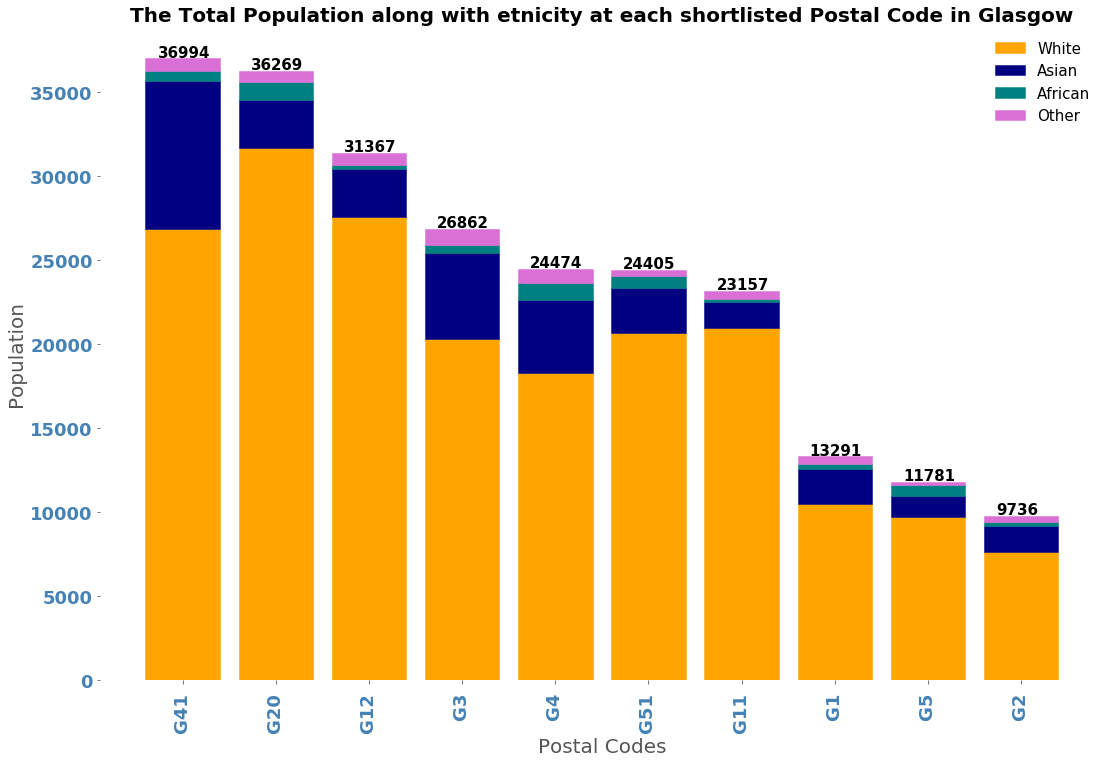

In [60]:
f, ax = plt.subplots(figsize=(18, 12))
plt.xticks(fontsize=18, rotation=90, color='steelblue', fontweight='bold')
plt.yticks(fontsize=18, rotation=0, color='steelblue', fontweight='bold')
ax.set_facecolor("white")

#sns.barplot(x="Post Code", y='All people', data=summary2, color="m")
plt.bar(summary2['Post Code'], summary2['White'], color='orange', edgecolor='orange', label="White")
plt.bar(summary2['Post Code'], summary2['Asian'], bottom=summary2['White'], color='navy', edgecolor='navy', label="Asian")
plt.bar(summary2['Post Code'], summary2['African'], bottom=summary2['White']+summary2['Asian'], color='teal', edgecolor='teal', label='African')
plt.bar(summary2['Post Code'], (summary2['All people']-(summary2['White']+summary2['Asian']+summary2['African'])), bottom=summary2['White']+summary2['Asian']+summary2['African'], color='orchid', edgecolor='orchid', label='Other')

ax.set_xlabel('Postal Codes', fontsize=20)
ax.set_ylabel("Population", fontsize=20)
ax.set_title('The Total Population along with etnicity at each shortlisted Postal Code in Glasgow', fontsize=20, fontweight='bold')
ax.legend(loc="upper right", frameon=False, fontsize=15, facecolor="white")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i, label in enumerate(list(summary2['All people'].index)):
    score = summary2.loc[label]['All people']
    ax.annotate((str(round(score,2))), (i-0.27, score+100), size=15, color='k', weight='bold')

In order to further analyse the top 10 post codes <span style="color:red">**(G41, G20, G12, G3, G4, G51, G11, G1, G5 and G2)**</span>, The percentage of the top three ethnicities at each postal districts is plotted.  

### 2.3.2 Plotting the percentage of the top three ethnicities

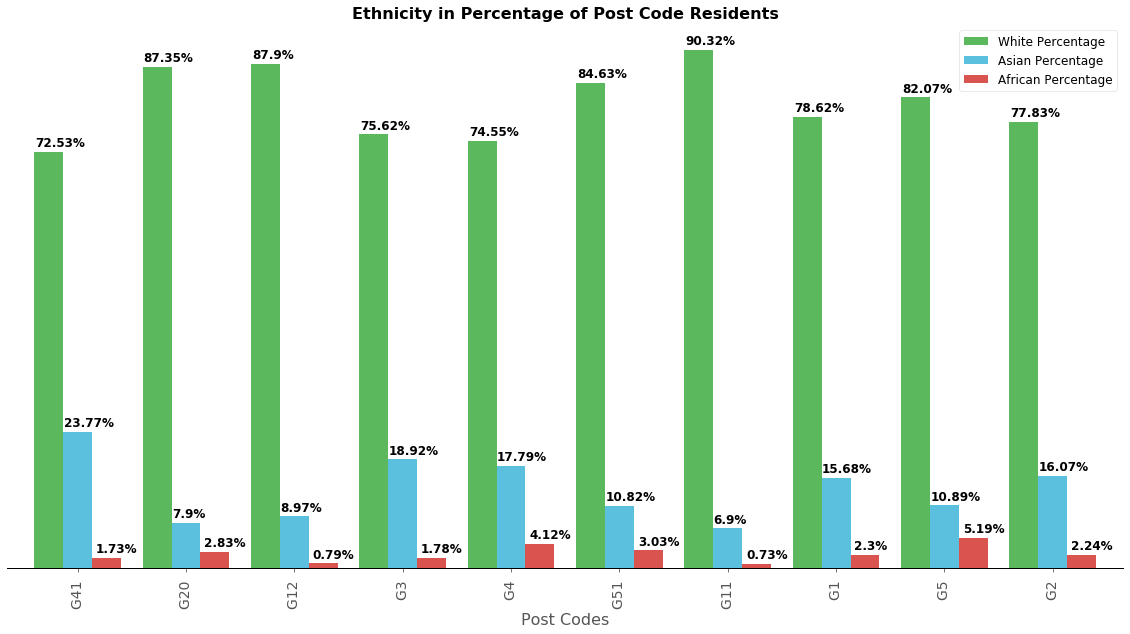

In [61]:
subset=summary2[['Post Code','White Percentage', 'Asian Percentage','African Percentage']]
subset=subset[0:11]
subset=subset.set_index('Post Code')

mpl.rc('axes',edgecolor='black')
ax=subset.plot(kind='bar', figsize=(20, 10), color=['#5cb85c', '#5bc0de', '#d9534f'], width=0.8, fontsize=14)
ax.spines["right"].set_visible(False)

ax.set_title('Ethnicity in Percentage of Post Code Residents', fontsize=16, loc='center', fontweight='bold')
ax.set_xlabel('Post Codes', fontsize=16)

ax.legend(fontsize=12, shadow=False, facecolor="white", loc='upper right', ncol=1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.axes.get_yaxis().set_ticks([])
ax.set_facecolor("white")

for i, label in enumerate(list(subset['White Percentage'].index)):
    score = subset.loc[label]['White Percentage']
    ax.annotate((str(round(score,2))+str('%')), (i-0.39, score+1), size=12, rotation=0, fontweight='bold')

for i, label in enumerate(list(subset['Asian Percentage'].index)):
    score = subset.loc[label]['Asian Percentage']
    ax.annotate((str(round(score,2))+str('%')), (i-0.13, score+1),size=12, rotation=0, fontweight='bold')
    
for i, label in enumerate(list(subset['African Percentage'].index)):
    score = subset.loc[label]['African Percentage']
    ax.annotate((str(round(score,2))+str('%')), (i+0.17, score+1), size=12, rotation=0, fontweight='bold')

### 2.3.3 Donot plots of population diversity are plotted for top ten postal codes

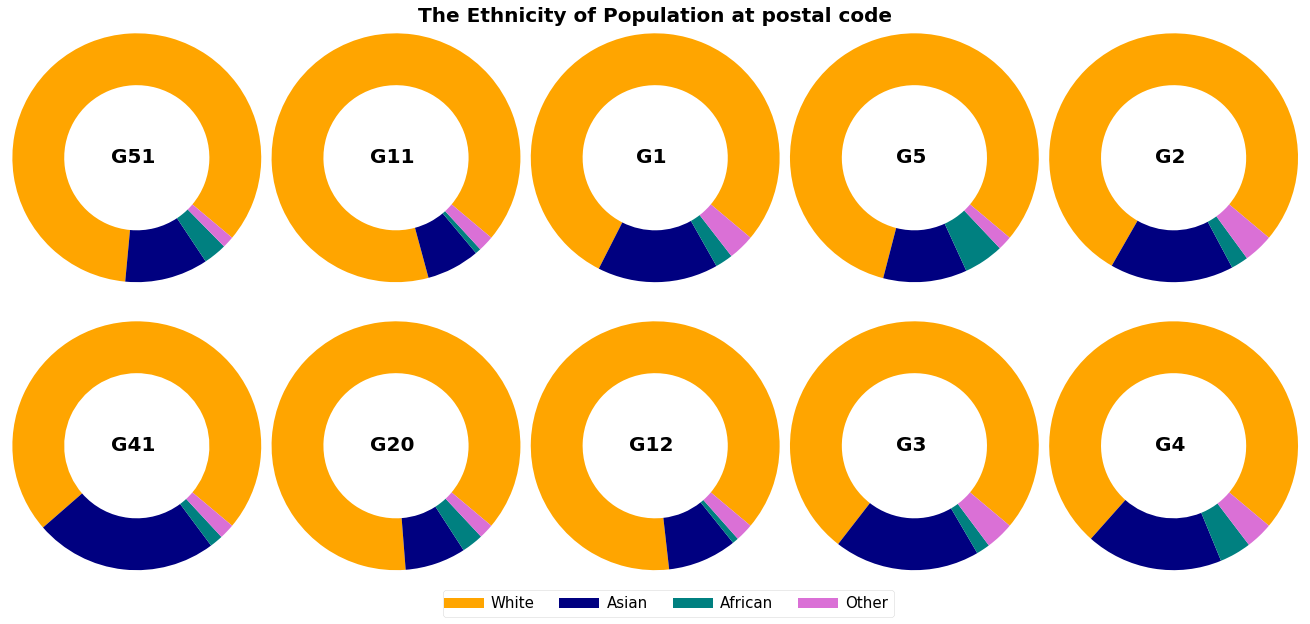

In [62]:
#Plotting Donut Plots
cols = ['orange', 'navy', 'teal', 'orchid']

fig = plt.figure(figsize=(18, 20))
labels = ['White', 'Asian', 'African', 'Other']

pos1=[0, 0.2, 0.4, 0.6, 0.8, 0,0.2,0.4,0.6,0.8]
pos2=[0,0,0,0,0,0.2, 0.2, 0.2, 0.2, 0.2]

for n in range (len(pos1)):
    if n>9:
        break
    data1 = [summary2['White'][n], summary2['Asian'][n], summary2['African'][n], (summary2['All people'][n]-(summary2['White'][n]+summary2['Asian'][n]+summary2['African'][n]))]
    ax = fig.add_axes([pos1[n], pos2[n], .2, .2], aspect=1)
    ax.pie(data1, wedgeprops=dict(width=0.5), radius = 1.2, startangle=-40, colors=cols)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, summary2['Post Code'][n], ha='center', **kwargs)
    if n==7:
        ax.set_title('The Ethnicity of Population at postal code',fontweight='bold', fontsize=20)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=10),
                Line2D([0], [0], color='navy', lw=10),
                Line2D([0], [0], color='teal', lw=10),
                Line2D([0], [0], color='orchid', lw=10)]

ax.legend(custom_lines, ['White', 'Asian', 'African', 'Other'], ncol=4, facecolor="white", loc='lower center', bbox_to_anchor=(-1.7, -1.3, 0.5, 0.5), fontsize=15)
plt.show()

As can be seen from the donut plots. Some post codes have similar population diversity like G12 and G11. This similarity maybe due to the geographical proximity of the postal codes to each other. Similarly, G4 and G3 have similar population diversity as well. In order to better cluster that postal codes, k-means algorithm will be used to cluster the neighbourhood based on the population data along with the most popular venues within these postal codes. 

The postal codes were narrowed down from an initial list of 56 options to 10. For these 10 postal codes, population information was extracted and plotted in this section. This concludes the second stage of the project. For Further analysis of these postal codes, the venue data is acquired using the FoursquaresAPI. 

--- 

# Stage 3 <a name="Stage3"></a>
---

The postal codes shown above are further analysed. 

**Summary of final Post codes**  

Postal Code | Latitude | Longitude 
--- | --- | --- 
G1 | 55.859126 | -4.246316
G2 | 55.863319 | -4.261671 
G3 | 55.859699	 | -4.271292
G4 | 55.853724 | -4.232824
G5 | 55.851813 | -4.253163
G11 | 55.877340 | -4.321745
G12 | 55.879886 | -4.292322
G20 | 55.890787 | -4.290405
G41 | 55.842266 | -4.284997
G51 | 55.854152 | -4.294398

These post codes meet the two criteria identified at the beginning of the search. 

1. They are within 5 km of the City Centre
2. They are within 2 km of the subway are easily accessible address.

### 3.1 The optimum radius for venue search around these postal codes is determined 

The first step is to identify the radius of the search area around each postal code. 

In [63]:
summary2['Post Code']= summary2['Post Code'].str.rsplit(" ", n =0 , expand = False).str[0]
Glasgow_dss=Glasgow_dss.rename(columns={"Postcode district": "Post Code"})
Top= pd.merge(Glasgow_dss, summary2, on='Post Code')

In [64]:
# create map centered around Glasgow
map_Glasgow_Subway_5k_Top = folium.Map(location=[latitude, longitude], zoom_start=11.5)

for lat, lng, post in zip(Top['Latitude'], Top['Longitude'], Top['Post Code']):
    label = 'Postal Code: {}'.format(post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.9,
        parse_html=False).add_to(map_Glasgow_Subway_5k_Top)
    folium.Circle(
    location=[lat, lng],
    radius=1500,
    color='yellow',
    fill=True,
    stroke= False,
    fill_color='magenta',
    fill_opacity=0.2
    ).add_to(map_Glasgow_Subway_5k_Top)

map_Glasgow_Subway_5k_Top

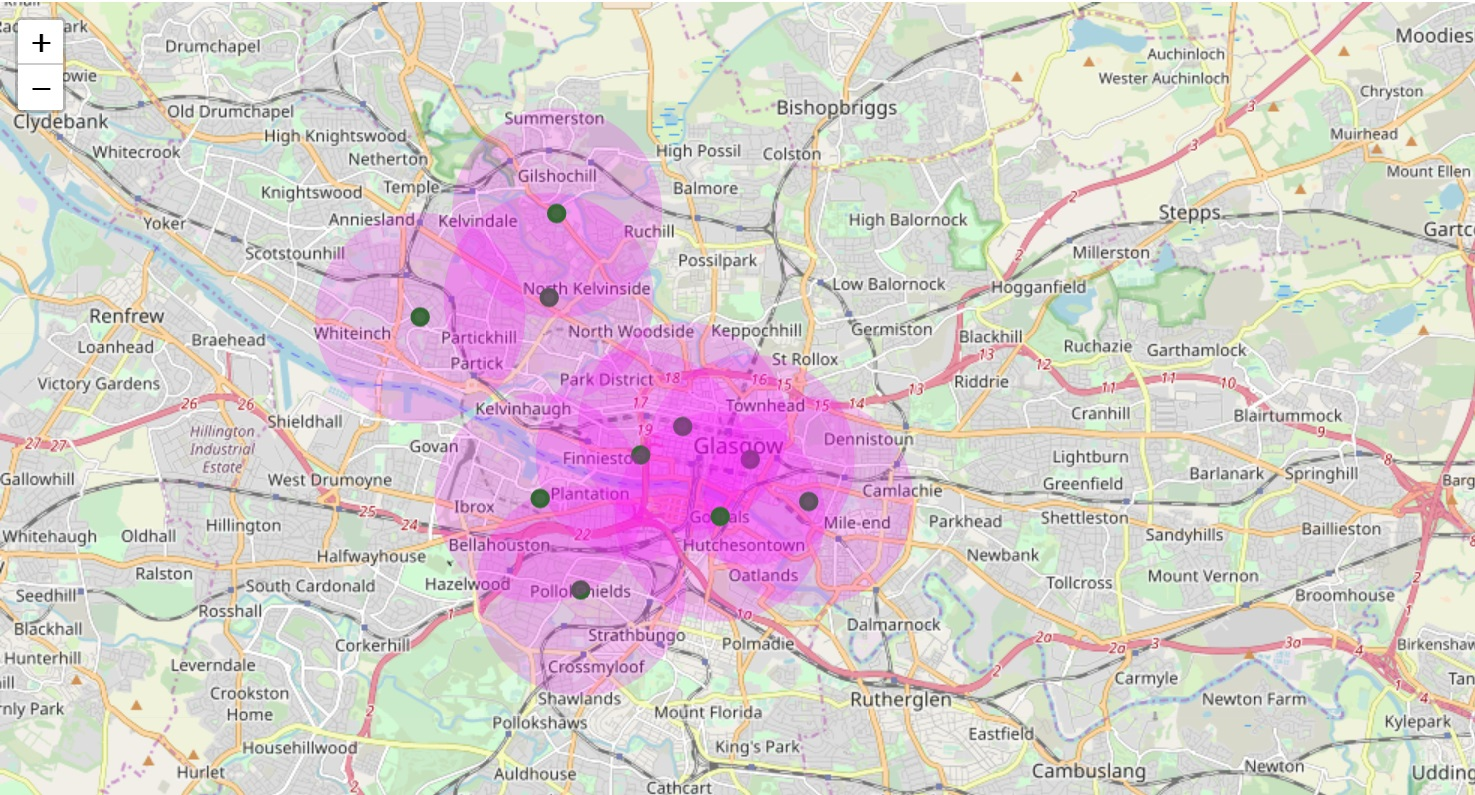

In [65]:
from IPython.display import Image
Image("Images/Glasgow_top.jpg")

Using a radius of <span style="color:maroon">**1500 m**</span> around the postal codes is a good radius because it will result in a wide search area. 

**Note:** Other postal codes border the shortlisted postal codes. So, when this radius is specified as a parameter of search in the Foursquare API, it might result in returning venues that belong to the neighbouring postal codes as well. These venues will be removed in the data processing stage. Also, there is a lot of overlap between the areas of search. Therefore, the FoursquareAPI might return the same venues multiple times. The repeating entries will be removed in the data processing stage.

### 3.2 Using the FourSquareAPI for venue extraction

Once the radius of search has been determined, The parameters are feed into the FoursquareAPI to find all possible venues within 1500 meters of the postal code centres.

#### 3.2.1 Importing the libraries

In [66]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### 3.2.2 Defining the Credentials, Variables and function

In [67]:
CLIENT_ID = 'QLWBFES2PFMPR1IVSL41IJ5ID3P34X5RKEVCZ4VOVZVTL2XR' # your Foursquare ID
CLIENT_SECRET = 'UOQMJWU4JSHHHKVBCXAFB2X5VBVRSFKCHKSSLUZHISU0LFFZ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QLWBFES2PFMPR1IVSL41IJ5ID3P34X5RKEVCZ4VOVZVTL2XR
CLIENT_SECRET:UOQMJWU4JSHHHKVBCXAFB2X5VBVRSFKCHKSSLUZHISU0LFFZ


In [68]:
radius= 1500
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### 3.2.3 Finding the nearest 100 venues from the first Postal Code

In [69]:
latitude= Top['Latitude'][0]
longitude= Top['Longitude'][0]
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
'There are {} venues around the postal code'.format(len(results['response']['groups'][0]['items']))
items = results['response']['groups'][0]['items']
# function that extracts the category of the venue
dataframe = json_normalize(items) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
dataframe_filtered.head()
G1 =dataframe_filtered

In [70]:
Post=G1['postalCode']
postupper=Post.str.upper()
G1['postalCode']=postupper
G1=G1.dropna(subset=['postalCode'])
G1['Post']= G1['postalCode'].str.rsplit(" ", n =0 , expand = False).str[0]

C:\Users\rabiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
venues=G1

In [72]:
G1.shape

(96, 17)

Around this postal code, 96 venues are returned.

#### 3.2.4 Finding the nearest venues from the other postal codes 

A for loop is used to extract the venues from each postal code. The results of each query is concatenated with the previous venue list in order to grow that data frame

In [73]:
for n in range (1,Top.shape[0]):
    latitude= Top['Latitude'][n]
    longitude= Top['Longitude'][n]
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    'There are {} venues around the Postal Code'.format(len(results['response']['groups'][0]['items']))
    items = results['response']['groups'][0]['items']
    dataframe = json_normalize(items) # flatten JSON
    # filter columns
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean columns
    dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
    dataframe_filtered.head()
    # DF TO EXCEL
    from pandas import ExcelWriter
    G2 =dataframe_filtered
    
    #Preprocessing the data 
    Post=G2['postalCode']
    postupper=Post.str.upper()
    G2['postalCode']=postupper
    G2=G2.dropna(subset=['postalCode'])
    G2['Post']= G2['postalCode'].str.rsplit(" ", n =0 , expand = False).str[0]
    
    #print(G2.shape[0])

    #concatenate the arrays to grow the venues list
    venues=pd.concat([venues, G2], ignore_index=True, sort=False, verify_integrity=True)
    

C:\Users\rabiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
venues.shape

(786, 17)

#### 3.2.5 Processing the veues data set

Postal Code | G1 | G2 | G3 | G4 | G5 | G11 | G12 | G20 | G41 | G51 | Total 
---         |--- |--- |--- |--- |--- |---  |---  |---  |---  |---  |--- 
Venues Returned | 96 | 96 | 96 | 93 | 94 | 53 | 92 | 19 | 58 | 89 | 786

The summary of the Venues returned by the FoursquareAPI is given above. These 786 venues represent venues from the neighbouring postal codes and repeating entries. The dataset is processed to remove such entries. Each venue has a unique id in FourSquare. So, repeating ids are removed using the drop_duplicates function on the id column

In [75]:
shortlisted_Postcodes=Top['Post Code']
FinalVenues=venues.loc[venues['Post'].isin(shortlisted_Postcodes)]
FinalVenues=FinalVenues.drop_duplicates(['id'],inplace=False)
FinalVenues.reset_index(drop=True,inplace = True)

In [76]:
FinalVenues.shape

(420, 17)

In [77]:
from pandas import ExcelWriter
writer = ExcelWriter('venues.xlsx')
FinalVenues.to_excel(writer,'Sheet1')
writer.save()

The final data set has **420** unique venues in the shortlisted postcodes. These venues are saved in an excel file. This concludes stage 3 of the project.

---

# Stage 4 <a name="Stage4"></a>
---

In this stage of the project, the venues obtained in the last stage are processed. There are 112 unique venue categories. They are one hot encoded. Then the top five venues are found in each postal code. These Top five venue is saved in a dataframe. The population data frame is normalized and is then merged with the data frame containing the Top 5 venues. This dataframe is then feed into a k-mean clustering algorithm in order to classify the postal codes into 5 distinct categories. The clusters are then colour coded and plotted on a Map.

#### 4.1 Performing One-hot encoding 

In [78]:
FinalVenues=FinalVenues[['name','categories', 'lat', 'lng', 'distance', 'Post']]
FinalVenues=FinalVenues.rename(columns={"Post": "Postcode district"})

In [79]:
Glasgow_Venues = pd.merge(FinalVenues, Glasgow_df_latlng, on='Postcode district')

In [80]:
print('There are {} uniques venue categories.'.format(len(Glasgow_Venues['categories'].unique())))

There are 112 uniques venue categories.


In [81]:
# one hot encoding
glasgow_onehot = pd.get_dummies(Glasgow_Venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
glasgow_onehot['Postcode district'] = Glasgow_Venues['Postcode district'] 

# move neighborhood column to the first column
fixed_columns = [glasgow_onehot.columns[-1]] + list(glasgow_onehot.columns[:-1])
glasgow_onehot = glasgow_onehot[fixed_columns]

glasgow_onehot.head()

Postcode district  American Restaurant  Art Gallery  Asian Restaurant  \
0                G1                    0            0                 0   
1                G1                    0            0                 0   
2                G1                    0            0                 0   
3                G1                    0            0                 0   
4                G1                    0            0                 0   

   BBQ Joint  Bakery  Bar  Bed & Breakfast  Beer Bar  Beer Store  ...  \
0          0       0    0                0         0           0  ...   
1          0       0    0                0         1           0  ...   
2          0       0    0                0         0           0  ...   
3          0       0    0                0         0           0  ...   
4          0       0    0                0         0           0  ...   

   Tea Room  Thai Restaurant  Theater  Thrift / Vintage Store  \
0         0                0        0                       0   
1         0                0        0                       0   
2         0                0        0                       0   
3         0                0        0                       0   
4         0                0        0                       0   

   Toy / Game Store  Train Station  Vegetarian / Vegan Restaurant  \
0                 0              0                              0   
1                 0              0                              0   
2                 0              0                              0   
3                 0              0                              0   
4                 0              0                              0   

   Vietnamese Restaurant  Warehouse Store  Whisky Bar  
0                      0                0           0  
1                      0                0           0  
2                      0                0           0  
3                      0                0           0  
4                      0                0           0  

[5 rows x 113 columns]

In [82]:
glasgow_onehot.shape

(420, 113)

In [83]:
glasgow_grouped = glasgow_onehot.groupby('Postcode district').mean().reset_index()
glasgow_grouped

Postcode district  American Restaurant  Art Gallery  Asian Restaurant  \
0                G1             0.012195     0.012195          0.012195   
1               G11             0.000000     0.000000          0.000000   
2               G12             0.000000     0.000000          0.000000   
3                G2             0.000000     0.000000          0.013889   
4               G20             0.000000     0.000000          0.000000   
5                G3             0.000000     0.026667          0.000000   
6                G4             0.058824     0.000000          0.000000   
7               G41             0.000000     0.025000          0.000000   
8                G5             0.062500     0.000000          0.000000   
9               G51             0.000000     0.000000          0.000000   

   BBQ Joint    Bakery       Bar  Bed & Breakfast  Beer Bar  Beer Store  ...  \
0   0.000000  0.000000  0.085366         0.000000  0.012195    0.000000  ...   
1   0.000000  0.000000  0.000000         0.000000  0.029412    0.000000  ...   
2   0.017544  0.035088  0.105263         0.000000  0.000000    0.017544  ...   
3   0.000000  0.000000  0.125000         0.000000  0.013889    0.000000  ...   
4   0.000000  0.222222  0.111111         0.000000  0.000000    0.000000  ...   
5   0.000000  0.000000  0.093333         0.013333  0.013333    0.013333  ...   
6   0.000000  0.000000  0.000000         0.000000  0.000000    0.000000  ...   
7   0.000000  0.050000  0.050000         0.000000  0.025000    0.000000  ...   
8   0.000000  0.000000  0.062500         0.000000  0.000000    0.000000  ...   
9   0.000000  0.000000  0.055556         0.000000  0.000000    0.000000  ...   

   Tea Room  Thai Restaurant   Theater  Thrift / Vintage Store  \
0  0.012195         0.012195  0.000000                0.000000   
1  0.000000         0.000000  0.000000                0.029412   
2  0.017544         0.000000  0.000000                0.017544   
3  0.027778         0.000000  0.027778                0.000000   
4  0.000000         0.000000  0.000000                0.000000   
5  0.013333         0.000000  0.000000                0.000000   
6  0.000000         0.000000  0.000000                0.000000   
7  0.000000         0.000000  0.000000                0.000000   
8  0.000000         0.000000  0.062500                0.000000   
9  0.000000         0.000000  0.000000                0.000000   

   Toy / Game Store  Train Station  Vegetarian / Vegan Restaurant  \
0          0.012195       0.000000                       0.000000   
1          0.000000       0.029412                       0.000000   
2          0.000000       0.017544                       0.000000   
3          0.000000       0.000000                       0.000000   
4          0.000000       0.000000                       0.000000   
5          0.000000       0.000000                       0.013333   
6          0.000000       0.000000                       0.000000   
7          0.000000       0.025000                       0.000000   
8          0.000000       0.000000                       0.000000   
9          0.000000       0.000000                       0.000000   

   Vietnamese Restaurant  Warehouse Store  Whisky Bar  
0               0.000000         0.000000    0.000000  
1               0.000000         0.029412    0.029412  
2               0.017544         0.000000    0.000000  
3               0.000000         0.000000    0.013889  
4               0.000000         0.000000    0.000000  
5               0.000000         0.000000    0.026667  
6               0.000000         0.000000    0.000000  
7               0.000000         0.000000    0.000000  
8               0.000000         0.000000    0.000000  
9               0.000000         0.000000    0.000000  

[10 rows x 113 columns]

In [84]:
glasgow_grouped.shape

(10, 113)

#### 4.2 Printing the Top 5  most common venues in each postal district

In [85]:
num_top_venues = 5

for hood in glasgow_grouped['Postcode district']:
    print("----"+hood+"----")
    temp = glasgow_grouped[glasgow_grouped['Postcode district'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----G1----
          venue  freq
0   Coffee Shop  0.11
1           Bar  0.09
2           Pub  0.07
3          Café  0.05
4  Cocktail Bar  0.05


----G11----
                venue  freq
0                Café  0.15
1                 Pub  0.12
2         Supermarket  0.09
3          Restaurant  0.09
4  Chinese Restaurant  0.06


----G12----
                venue  freq
0                 Bar  0.11
1         Coffee Shop  0.09
2                 Pub  0.07
3                Café  0.07
4  Italian Restaurant  0.05


----G2----
                venue  freq
0                 Bar  0.12
1               Hotel  0.10
2                Café  0.06
3  Italian Restaurant  0.04
4        Burger Joint  0.03


----G20----
            venue  freq
0          Bakery  0.22
1             Pub  0.11
2  Soccer Stadium  0.11
3   Grocery Store  0.11
4             Gym  0.11


----G3----
               venue  freq
0         Restaurant  0.11
1  Indian Restaurant  0.09
2                Bar  0.09
3        Coffee Shop  0.07
4     

#### 4.3 Creating a data frame of the Top 5 venues

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode district']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Postcode district'] = glasgow_grouped['Postcode district']

for ind in np.arange(glasgow_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(glasgow_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Postcode district 1st Most Common Venue 2nd Most Common Venue  \
0                G1           Coffee Shop                   Bar   
1               G11                  Café                   Pub   
2               G12                   Bar           Coffee Shop   
3                G2                   Bar                 Hotel   
4               G20                Bakery        Soccer Stadium   
5                G3            Restaurant     Indian Restaurant   
6                G4                  Café         Deli / Bodega   
7               G41                  Café                   Pub   
8                G5                 Hotel   American Restaurant   
9               G51                 Hotel        Sandwich Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                   Pub    Seafood Restaurant                  Café  
1           Supermarket            Restaurant    Chinese Restaurant  
2                  Café                   Pub    Italian Restaurant  
3                  Café    Italian Restaurant    Chinese Restaurant  
4                   Gym        Sandwich Place                   Pub  
5                   Bar           Coffee Shop                 Hotel  
6         Grocery Store     Indian Restaurant                   Pub  
7  Fast Food Restaurant        Sandwich Place           Coffee Shop  
8  Fast Food Restaurant         Movie Theater    Seafood Restaurant  
9   Lebanese Restaurant          Climbing Gym        Scenic Lookout

#### 4.4 Normalizing the population data before feeding it to K-means algorithm

In [88]:
Top2=Top[['Post Code', 'Distance from Center', 'Distance from Nearest Subway', 'All people', 'White', 'White Percentage','Asian', 'Asian Percentage', 'African', 'African Percentage','Other', 'Other Percentage']]
Top2=Top2.rename(columns={'Post Code': "Postcode district"})
Top=Top.rename(columns={'Post Code': "Postcode district"})

In [89]:
from sklearn import preprocessing

tonormalize=Top2.loc[:, 'Distance from Center':]
x = tonormalize.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled)
normalized=normalized.rename(columns={0: "Distance from Center", 1:'Distance from Nearest Subway',2:'All people', 3:'White', 4:'White Percentage', 5:'Asian', 6:'Asian Percentage',
       7:'African', 8:'African Percentage', 9:'Other', 10:'Other Percentage'})
normalized['Postcode district']=Top2['Postcode district']

#### 4.5 Merging the two data frames

In [90]:
Glasgow_knn = pd.merge(glasgow_grouped, normalized, on='Postcode district')

#### 4.6 Applying K-means to the data set

In [91]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
#kclusters = 5

glasgow_grouped_clustering = Glasgow_knn.drop('Postcode district', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(glasgow_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 2, 3, 4, 0, 0, 0, 1, 1])

In [92]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

glasgow_merged = Top

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
glasgow_merged = glasgow_merged.join(neighborhoods_venues_sorted.set_index('Postcode district'), on='Postcode district')

glasgow_merged.head() # check the last columns!

Postcode district Post town  \
0                G1   GLASGOW   
1                G2   GLASGOW   
2                G3   GLASGOW   
3                G4   GLASGOW   
4                G5   GLASGOW   

                                            Coverage Local authority area  \
0                                      Merchant City         Glasgow City   
1                  Blythswood Hill, Anderston (part)         Glasgow City   
2  Anderston, Finnieston, Garnethill, Park, Woodl...         Glasgow City   
3  Calton (part), Cowcaddens (part), Drygate, Kel...         Glasgow City   
4                                            Gorbals         Glasgow City   

          District   Latitude  Longitude  Distance from Center  \
0    Merchant City  55.859126  -4.246316              0.261226   
1  Blythswood Hill  55.863319  -4.261671              0.839709   
2        Anderston  55.859699  -4.271292              1.406410   
3          Calton   55.853724  -4.232824              1.287026   
4          Gorbals  55.851813  -4.253163              1.054402   

   Distance from Nearest Subway   Nearest Subway  ... African  \
0                      0.550108  Buchanan Street  ...     306   
1                      0.526778  Buchanan Street  ...     218   
2                      0.912032      West Street  ...     478   
3                      1.474669        St. Enoch  ...    1008   
4                      0.390402    Bridge Street  ...     611   

  African Percentage  Other Other Percentage  Cluster Labels  \
0           2.302310    451         3.393274               3   
1           2.239113    375         3.851684               3   
2           1.779465    989         3.681781               0   
3           4.118657    868         3.546621               0   
4           5.186317    218         1.850437               1   

  1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop                    Bar                   Pub   
1                   Bar                  Hotel                  Café   
2            Restaurant      Indian Restaurant                   Bar   
3                  Café          Deli / Bodega         Grocery Store   
4                 Hotel    American Restaurant  Fast Food Restaurant   

   4th Most Common Venue  5th Most Common Venue  
0     Seafood Restaurant                   Café  
1     Italian Restaurant     Chinese Restaurant  
2            Coffee Shop                  Hotel  
3      Indian Restaurant                    Pub  
4          Movie Theater     Seafood Restaurant  

[5 rows x 25 columns]

#### 4.7 Plotting the color coded clusters on a Map

In [93]:
# create map
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

latitude = 55.859699
longitude = -4.271292

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(glasgow_merged['Latitude'], glasgow_merged['Longitude'], glasgow_merged['Postcode district'], glasgow_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

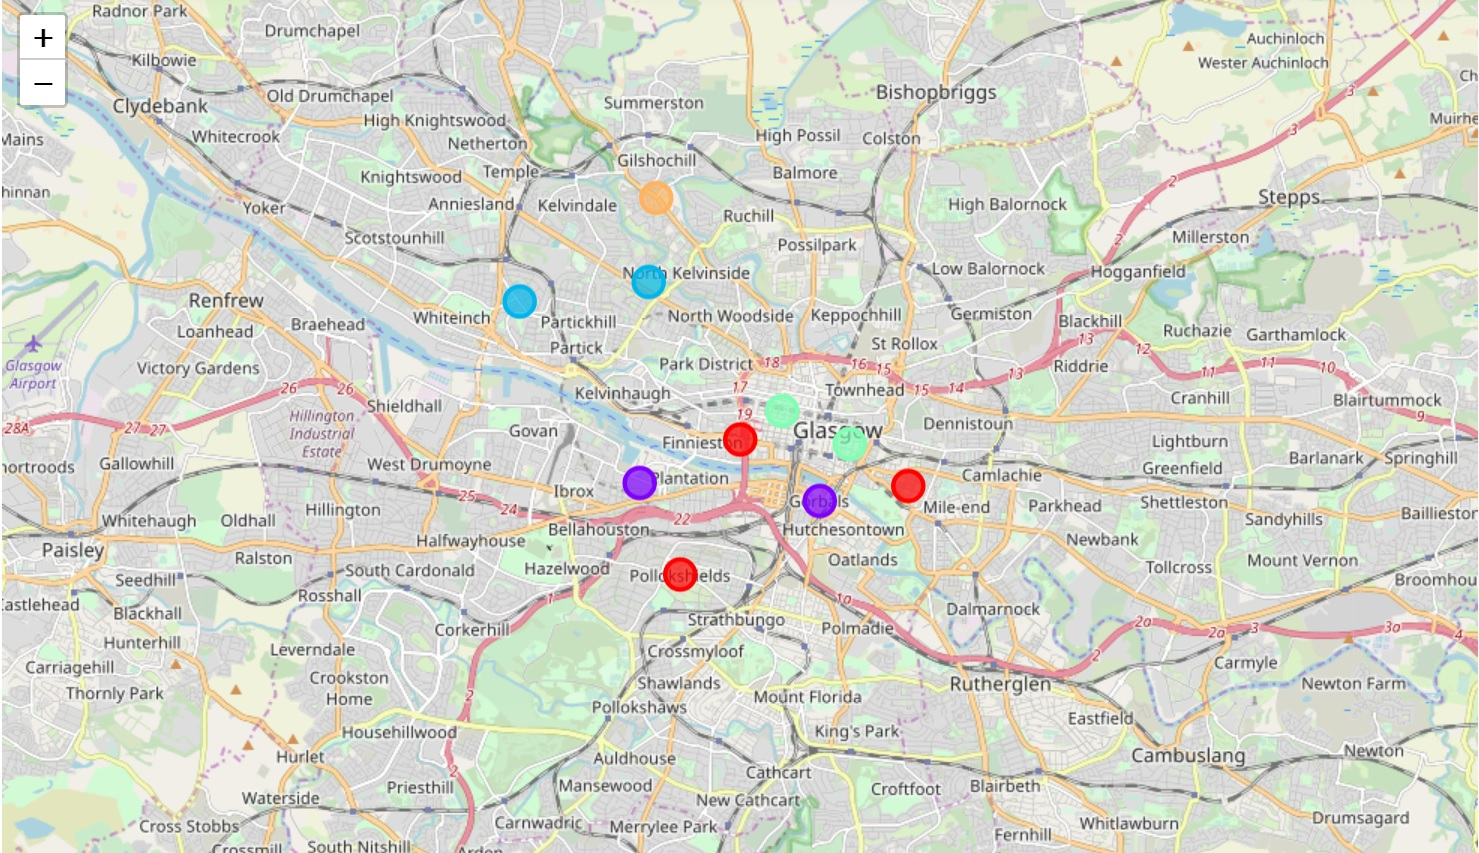

In [94]:
Image("Images/Clusters.jpg")

---

# Results and Discussion <a name="Results"></a>
---

### Cluster 1

In [95]:
cluster0=glasgow_merged[glasgow_merged['Cluster Labels']==0]
cluster0=cluster0.drop(columns=['Post town', 'Coverage', 'Local authority area', 'District'])
cluster0

Postcode district   Latitude  Longitude  Distance from Center  \
2                G3  55.859699  -4.271292              1.406410   
3                G4  55.853724  -4.232824              1.287026   
8               G41  55.842266  -4.284997              3.069140   

   Distance from Nearest Subway Nearest Subway All people  White  \
2                      0.912032    West Street      26862  20312   
3                      1.474669      St. Enoch      24474  18245   
8                      0.927243   Kinning Park      36994  26830   

   White Percentage Asian  ...  African African Percentage  Other  \
2         75.616112  5083  ...      478           1.779465    989   
3         74.548500  4353  ...     1008           4.118657    868   
8         72.525274  8792  ...      639           1.727307    733   

  Other Percentage  Cluster Labels  1st Most Common Venue  \
2         3.681781               0             Restaurant   
3         3.546621               0                   Café   
8         1.981402               0                   Café   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2     Indian Restaurant                   Bar           Coffee Shop   
3         Deli / Bodega         Grocery Store     Indian Restaurant   
8                   Pub  Fast Food Restaurant        Sandwich Place   

  5th Most Common Venue  
2                 Hotel  
3                   Pub  
8           Coffee Shop  

[3 rows x 21 columns]

This Cluster has member postal codes with the highest population diversity. It seems that food related venues are really common in these postal codes. 

**Possible Opportunities at these postal codes-**
These Postal codes have among the highest Asian Population density in Glasgow. Asian themed businesses are likely to succeed in these three postal codes. So, these three postal codes <span style="color:navy">G3, G4 and G41</span> are recommended as venues for new Asian businesses.

### Cluster 2

In [96]:
cluster1=glasgow_merged[glasgow_merged['Cluster Labels']==1]
cluster1=cluster1.drop(columns=['Post town', 'Coverage', 'Local authority area', 'District'])
cluster1

Postcode district   Latitude  Longitude  Distance from Center  \
4                G5  55.851813  -4.253163              1.054402   
9               G51  55.854152  -4.294398              2.941483   

   Distance from Nearest Subway Nearest Subway All people  White  \
4                      0.390402  Bridge Street      11781   9669   
9                      0.159598       Cessnock      24405  20653   

   White Percentage Asian  ...  African African Percentage  Other  \
4         82.072829  1283  ...      611           5.186317    218   
9         84.626101  2641  ...      740           3.032166    371   

  Other Percentage  Cluster Labels  1st Most Common Venue  \
4         1.850437               1                  Hotel   
9         1.520180               1                  Hotel   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4   American Restaurant  Fast Food Restaurant         Movie Theater   
9        Sandwich Place   Lebanese Restaurant          Climbing Gym   

  5th Most Common Venue  
4    Seafood Restaurant  
9        Scenic Lookout  

[2 rows x 21 columns]

This cluster has a lot of hospitality and entertainment related venues. 

**Possible opportunities at these Post codes-**
At these postal codes there are not a lot of bars/pubs. So in <span style="color:navy">G5 and G51</span> new bars and pubs will face little competition. So, they are identified as possible business opportunities in this cluster.

### Cluster 3

In [97]:
cluster2=glasgow_merged[glasgow_merged['Cluster Labels']==2]
cluster2=cluster2.drop(columns=['Post town', 'Coverage', 'Local authority area', 'District'])
cluster2

Postcode district   Latitude  Longitude  Distance from Center  \
5               G11  55.877340  -4.321745              4.897992   
6               G12  55.879886  -4.292322              3.430967   

   Distance from Nearest Subway Nearest Subway All people  White  \
5                      1.124514        Partick      23157  20916   
6                      0.411294       Hillhead      31367  27572   

   White Percentage Asian  ...  African African Percentage  Other  \
5         90.322581  1598  ...      169           0.729801    474   
6         87.901298  2814  ...      249           0.793828    732   

  Other Percentage  Cluster Labels  1st Most Common Venue  \
5         2.046897               2                   Café   
6         2.333663               2                    Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5                   Pub           Supermarket            Restaurant   
6           Coffee Shop                  Café                   Pub   

  5th Most Common Venue  
5    Chinese Restaurant  
6    Italian Restaurant  

[2 rows x 21 columns]

This cluster has medium population and low diversity. Food related venues are common in this cluster.

**Possible opportunities at these Post codes-** These Postal codes are close to one of the largest universities in Glasgow. So, <span style="color:navy">G11 and G12</span> offer opportunities for student service businesses like books, stationary,  printing etc. These businesses have the potential to succeed in this area and have little competition at these post codes.

### Cluster 4

In [98]:
cluster3=glasgow_merged[glasgow_merged['Cluster Labels']==3]
cluster3=cluster3.drop(columns=['Post town', 'Coverage', 'Local authority area', 'District'])
cluster3

Postcode district   Latitude  Longitude  Distance from Center  \
0                G1  55.859126  -4.246316              0.261226   
1                G2  55.863319  -4.261671              0.839709   

   Distance from Nearest Subway   Nearest Subway All people  White  \
0                      0.550108  Buchanan Street      13291  10450   
1                      0.526778  Buchanan Street       9736   7578   

   White Percentage Asian  ...  African African Percentage  Other  \
0         78.624633  2084  ...      306           2.302310    451   
1         77.834840  1565  ...      218           2.239113    375   

  Other Percentage  Cluster Labels  1st Most Common Venue  \
0         3.393274               3            Coffee Shop   
1         3.851684               3                    Bar   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                   Bar                   Pub    Seafood Restaurant   
1                 Hotel                  Café    Italian Restaurant   

  5th Most Common Venue  
0                  Café  
1    Chinese Restaurant  

[2 rows x 21 columns]

These post codes have low population and medium diversity. Food related venues are common in this cluster. These postcodes also have the lowest distance from the city centre.

**Possible opportunities at these Post codes-** So in this cluster, postal codes are near the city centre. So, at <span style="color:navy">G1 and G2</span> there are opportunities for businesses that want to provide services to tourist like tour operators, souvenir shops etc.

In [99]:
cluster4=glasgow_merged[glasgow_merged['Cluster Labels']==4]
cluster4=cluster4.drop(columns=['Post town', 'Coverage', 'Local authority area', 'District'])
cluster4

Postcode district   Latitude  Longitude  Distance from Center  \
7               G20  55.890787  -4.290405              4.207631   

   Distance from Nearest Subway Nearest Subway All people  White  \
7                      1.629398       Hillhead      36269  31681   

   White Percentage Asian  ...  African African Percentage  Other  \
7         87.350079  2866  ...     1028           2.834376    694   

  Other Percentage  Cluster Labels  1st Most Common Venue  \
7          1.91348               4                 Bakery   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
7        Soccer Stadium                   Gym        Sandwich Place   

  5th Most Common Venue  
7                   Pub  

[1 rows x 21 columns]

This cluster has only one member. It is furthest away from the city centre and has a high population.

**Possible opportunities at this Post code-** This post code lacks entertainment venues. So new business can explore opportunities like opening a movie cinema or music venue at <span style="color:navy">G20.</span> This might be popular with residents who do not like travelling all the way to the city centre for entertainment.   

---

# Conclusion <a name="Conclusion"></a>

A summary of the Business Opportunities identified for each cluster in this project is given below.

K-means Cluster label | 0 | 1 | 2 | 3 | 4      
---                    |---|---|---|---|---
<span style="color:maroon">Postal codes in the cluster</span> | **G3, G4 and G41** | **G5 and G51** | **G11 and G12** | **G1 and G2** | **G20**
<span style="color:maroon">Possible Business Opportunities in this Cluster</span> | These Postal codes have among the highest Asian population density in Glasgow. Non-food Asian themed businesses are likely to face little competition in these three postal codes. So, they are recommended as venues for new Asian businesses. | In this cluster, there are a lot of hotels, bowling alleys, music venues and not a lot of food venues like restaurants, bars/pubs etc. So, new restaurants, bars and pubs will face little competition. So, they are identified as possible business opportunities in this cluster. | The Postal codes in this cluster are close to one of the largest universities in Glasgow. So, this cluster offers opportunities for student service businesses like books, stationary, printing shops etc. These businesses have the potential to succeed in this area and have little competition at these postcodes. | This cluster has postal codes that are near the city centre. So, at these postal codes there are opportunities for businesses that want to provide services to tourist like tour operators, souvenir shops, hotels etc. | This post code lacks entertainment venues. So, in G20 there are opportunities for entertainment & leisure businesses like movie cinema, music clubs etc that want to target a new sector of the Glasgow population.


This project uses publicly available datasets and the FourSquareAPI to provide businesses insights and recommendations about the best venues within Glasgow to set up businesses based on opportunities identified using the application of data analysis and Machine learning.   